### Import Libraries

In [8]:
import pandas as pd
import pandas_ta
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objs as go
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot
from pandas_datareader import data as pdr
import yfinance as yf
from yahoo_fin import stock_info as si
from datetime import date

## Query the SP500 through Yahoo

In [7]:
start_time = datetime.datetime(2022, 8, 1)
end_time = datetime.datetime(2023, 8, 1)

yf.pdr_override()
sp500 = pdr.get_data_yahoo('^GSPC', start_time, end_time)

sp500.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01 00:00:00-04:00,4112.379883,4144.950195,4096.020020,4118.629883,4118.629883,4202810000
2022-08-02 00:00:00-04:00,4104.209961,4140.470215,4079.810059,4091.189941,4091.189941,4727710000
2022-08-03 00:00:00-04:00,4107.959961,4167.660156,4107.959961,4155.169922,4155.169922,4351760000
2022-08-04 00:00:00-04:00,4154.850098,4161.290039,4135.419922,4151.939941,4151.939941,4283320000
2022-08-05 00:00:00-04:00,4115.870117,4151.580078,4107.310059,4145.189941,4145.189941,4085940000


In [9]:
stockTickers = si.tickers_sp500()
df = yf.download(tickers=stockTickers, start='2022-08-01', end='2023-08-01')
df = df.stack()

[*********************100%***********************]  503 of 503 completed


In [10]:
df.head()

Adj Close       Close        High  \
Date                                                                 
2022-08-01 00:00:00-04:00 A     132.531708  133.429993  135.229996   
                          AAL    14.280000   14.280000   14.320000   
                          AAP   189.182739  195.990005  196.710007   
                          AAPL  160.334778  161.509995  163.589996   
                          ABBV  134.753235  140.220001  142.839996   

                                       Low        Open      Volume  
Date                                                                
2022-08-01 00:00:00-04:00 A     133.259995  133.509995   1081700.0  
                          AAL    13.520000   13.670000  32730800.0  
                          AAP   192.009995  192.300003    545100.0  
                          AAPL  160.889999  161.009995  67829400.0  
                          ABBV  139.149994  141.509995   8523900.0

In [26]:
df['Adj Close']

Date                           
2022-08-01 00:00:00-04:00  A       132.531708
                           AAL      14.280000
                           AAP     189.182739
                           AAPL    160.334778
                           ABBV    134.753235
                                      ...    
2023-07-31 00:00:00-04:00  YUM     137.669998
                           ZBH     138.149994
                           ZBRA    307.959991
                           ZION     38.250000
                           ZTS     188.089996
Name: Adj Close, Length: 126157, dtype: float64

In [11]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [12]:
df['50_WMA'] = df.groupby(level=1)['Adj Close'].transform(lambda x: pandas_ta.wma(close=x, length=50))

In [20]:
df['100_WMA'] = df.groupby(level=1)['Adj Close'].transform(lambda x: pandas_ta.wma(close=x, length=100))

## Examine which Stock had its Adjusted Close Price Above/Below the Day

In [21]:
df['above_50_WMA'] = df.apply(lambda x:1 if (x['Adj Close'] > x['50_WMA']) else 0, axis=1)
df['above_100_WMA'] = df.apply(lambda x:1 if (x['Adj Close'] > x['100_WMA']) else 0, axis=1)

In [22]:
df.tail()

Adj Close       Close        High  \
Date                                                                 
2023-07-31 00:00:00-04:00 YUM   137.669998  137.669998  137.940002   
                          ZBH   138.149994  138.149994  139.309998   
                          ZBRA  307.959991  307.959991  308.040009   
                          ZION   38.250000   38.250000   39.110001   
                          ZTS   188.089996  188.089996  190.089996   

                                       Low        Open     Volume      50_WMA  \
Date                                                                            
2023-07-31 00:00:00-04:00 YUM   135.740005  136.330002  1463400.0  135.716386   
                          ZBH   137.679993  139.309998  1619500.0  140.624762   
                          ZBRA  299.350006  299.359985   545800.0  295.197857   
                          ZION   37.650002   38.919998  6188700.0   31.768212   
                          ZTS   186.440002  189.179993  1500800.0  174.152011   

                                   200_WMA  above_50_WMA  above_200_WMA  \
Date                                                                      
2023-07-31 00:00:00-04:00 YUM   135.254841             1              1   
                          ZBH   137.947583             0              1   
                          ZBRA  288.282048             1              1   
                          ZION   29.748124             1              1   
                          ZTS   173.319536             1              1   

                                   100_WMA  above_100_WMA  
Date                                                       
2023-07-31 00:00:00-04:00 YUM   135.254841              1  
                          ZBH   137.947583              1  
                          ZBRA  288.282048              1  
                          ZION   29.748124              1  
                          ZTS   173.319536              1

## Percentage of Companies Above 50-day WMA

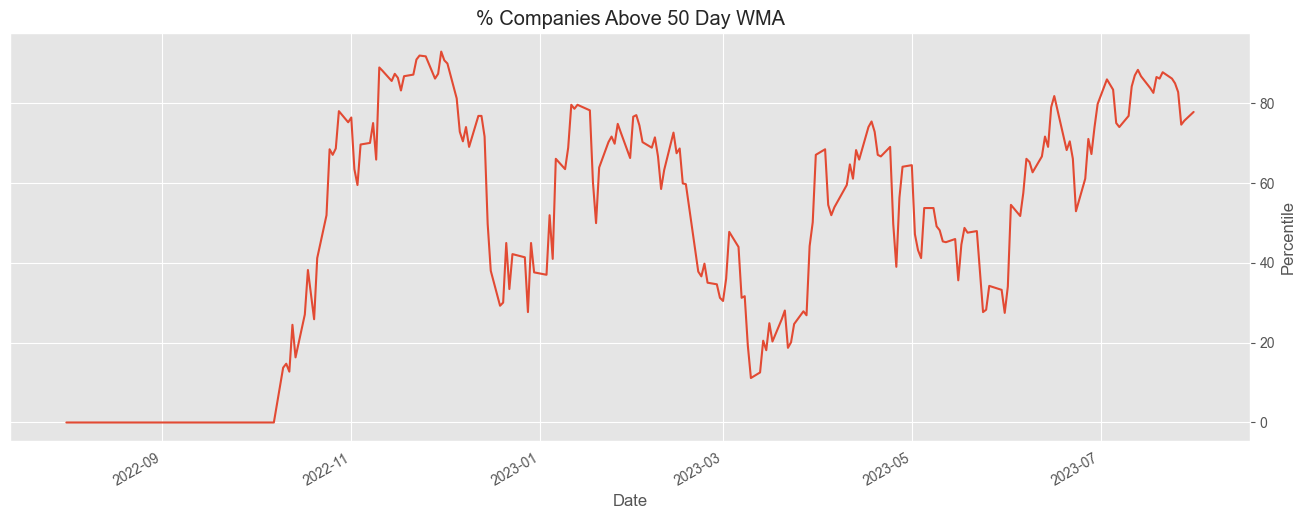

In [23]:
plt.style.use('ggplot')

ax50 = ((df.groupby(level=0)['above_50_WMA'].sum()/len(stockTickers))*100).plot(figsize=(16,6))
ax50.yaxis.set_label_position("right")
ax50.yaxis.tick_right()
ax50.set_ylabel('Percentile')
plt.title('% Companies Above 50 Day WMA')
plt.show()

## Percentage of Companies Above 100-day WMA

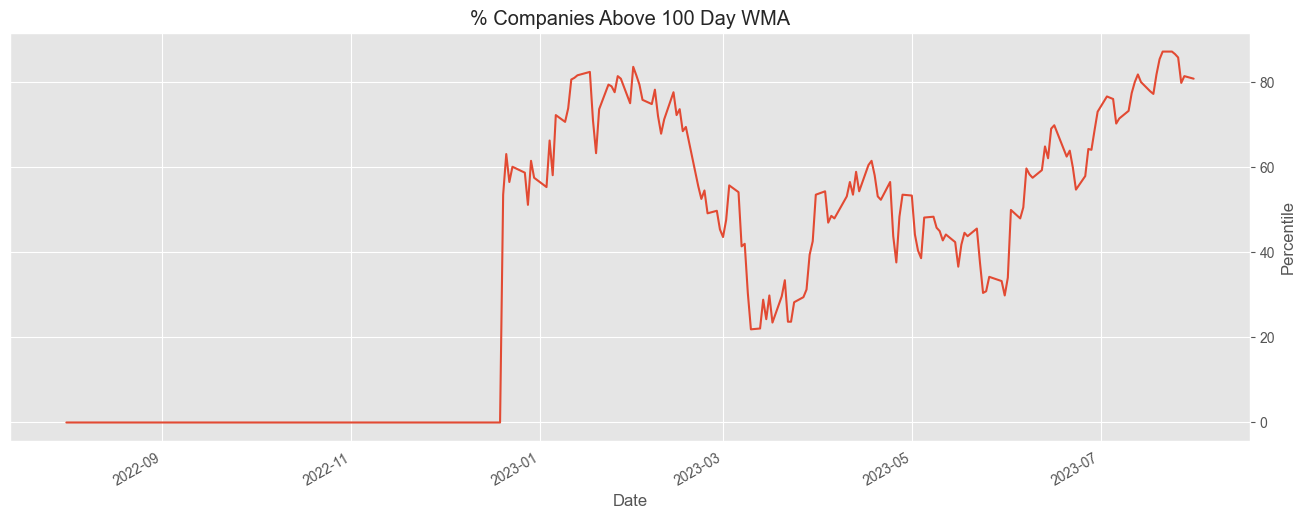

In [24]:
plt.style.use('ggplot')

ax50 = ((df.groupby(level=0)['above_100_WMA'].sum()/len(stockTickers))*100).plot(figsize=(16,6))
ax50.yaxis.set_label_position("right")
ax50.yaxis.tick_right()
ax50.set_ylabel('Percentile')
plt.title('% Companies Above 100 Day WMA')
plt.show()